# Udacity Data Science Nanodegree Project 1

I will be analyzing Seattle AirBnB data in this notebook.
The data can found at https://www.kaggle.com/airbnb/seattle/data

## Gather Data and Import relevant libraries

In [40]:
# Load all neccessary libraries and read the file
# The file is Seattle AirBnB Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gather data
calendar = pd.read_csv('./calendar.csv')
listings = pd.read_csv('./listings.csv')

## Assess and Clean Data

In [41]:
print(calendar.dtypes)
calendar.head()

listing_id     int64
date          object
available     object
price         object
dtype: object


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [42]:
# We need to Clean the data a little bit
# The date column is currently not in the right format
# Here's a way to convert it to pandas datetime format
calendar['date'] =  pd.to_datetime(calendar['date'], format='%Y-%m-%d')

In [43]:
# Check data type again to ensure data is in the right format.
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

##### Check for missing values

In [44]:
# False indicates there are no missing values
print(calendar.listing_id.isnull().any())
print(calendar.date.isnull().any())
print(calendar.available.isnull().any())

False
False
False


I didn't drop any row or column since there are no missing values.
NaN is present in the price column whenever a listing wasn't taken or booked by any customer

## Question : How many properties were listed?

In [45]:
print(len(calendar.listing_id.unique()), "properties were listed")

3818 properties were listed


## When was the earliest and latest listing?

In [46]:
print("The earliest listing was on",min(calendar.date)) #Jan 4 2016
print("The latest listing was on",max(calendar.date)) #Jan 2 2017

The earliest listing was on 2016-01-04 00:00:00
The latest listing was on 2017-01-02 00:00:00


## More Cleaning

In [47]:
# Extract Month, Weekday and Year into separate columns
calendar['Month'] = calendar['date'].dt.month
calendar['Year'] = calendar['date'].dt.year
calendar['Day'] = calendar['date'].dt.weekday

In [48]:
calendar.head()

,listing_id,date,available,price,Month,Year,Day
0,241032,2016-01-04,t,$85.00,1,2016,0
1,241032,2016-01-05,t,$85.00,1,2016,1
2,241032,2016-01-06,f,NaN,1,2016,2
3,241032,2016-01-07,f,NaN,1,2016,3
4,241032,2016-01-08,f,NaN,1,2016,4


In [49]:
# Months is currently represented in numbers, I'll replace them with Text Abbreviations
# for each month
Months = {1:'Jan',2:'Feb',3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
calendar['Month'].replace(Months, inplace=True)

In [50]:
# I'll do the same for weekdays
Weekday = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
calendar['Day'].replace(Weekday, inplace=True)

In [51]:
calendar.head()

,listing_id,date,available,price,Month,Year,Day
0,241032,2016-01-04,t,$85.00,Jan,2016,Mon
1,241032,2016-01-05,t,$85.00,Jan,2016,Tue
2,241032,2016-01-06,f,NaN,Jan,2016,Wed
3,241032,2016-01-07,f,NaN,Jan,2016,Thu
4,241032,2016-01-08,f,NaN,Jan,2016,Fri


## Analyze

## Question: Are the total number of listings similar on each week day?

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='count'>

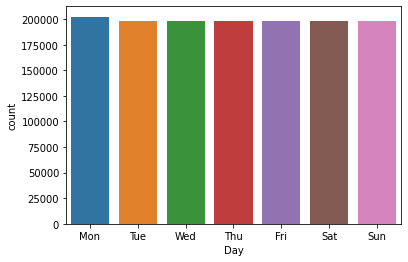

In [52]:
sns.countplot(calendar.Day)

As shown in the plot above, number of listings are similar on each weekday at about 200,000

## Question 2 : Are the total number of listings similar each month?

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

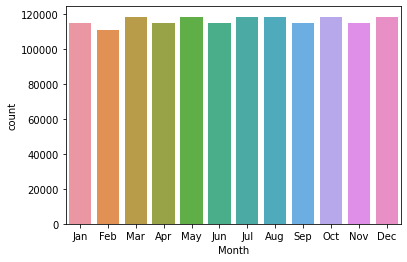

In [53]:
sns.countplot(calendar.Month)

About 120,000 listings were made every month of the year. There's a slight difference in the number of listings made every month.

## Question 3, Does Utilization vary by weekday?

##### Utilization defined as the ratio of Unavailable listings to Total listings.
To do this I'll write a function

In [54]:
def Utilization(Variable):
    """
    INPUT
    Variable: any column in the calendar data frame e.g Day or Month
    
    OUTPUT
    DF : A table showing Utlization for each distinct entry in the "Variable" column
    
    This function calculates Utilization as follows
    1. Group each entry by "Variable" and available columns
    2. Rename columns "f" to "NotAvail" and "t" to "Avail"
    3. Reset Index
    4. Calculate Utilization as a new column
    5. Return DF
    
    """
    DF = calendar.groupby([Variable,'available']).size().unstack()
    DF.columns = ['NotAvail','Avail']
    DF.reset_index(inplace=True)
    DF['Utilization'] = round((DF['NotAvail']/(DF['NotAvail']+DF['Avail']))*100,1)
    return DF

In [55]:
WkDayUtil = Utilization(Variable='Day')
WkDayUtil

,Day,NotAvail,Avail,Utilization
0,Fri,65733,132803,33.1
1,Mon,66554,135800,32.9
2,Sat,65962,132574,33.2
3,Sun,64921,133615,32.7
4,Thu,65568,132968,33.0
5,Tue,65129,133407,32.8
6,Wed,65161,133375,32.8


Utilization is about 33% on most weekdays
### Let's visualize for easy interpretation

<AxesSubplot:xlabel='Day', ylabel='Utilization'>

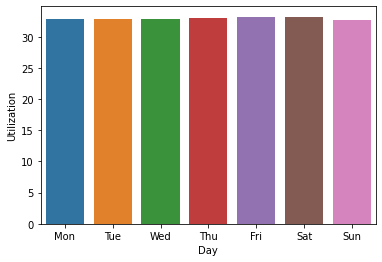

In [56]:
Days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
WkDayUtil['Day'] = pd.Categorical(WkDayUtil['Day'], categories = Days, ordered= True)
WkDayUtil.sort_values(by='Day', inplace=True)
sns.barplot(x="Day", y="Utilization",data=WkDayUtil)

The plot above confirms that most weekdays have similar percentage utilization at about 33%.

## Question 4 : Is Utilization similar for each Month?

In [57]:
# Using the Utilization function created earlier
MonthUtil = Utilization(Variable='Month')
MonthUtil

,Month,NotAvail,Avail,Utilization
0,Apr,38503,76037,33.6
1,Aug,42011,76347,35.5
2,Dec,31297,87061,26.4
3,Feb,37401,73321,33.8
4,Jan,49603,64937,43.3
5,Jul,44136,74222,37.3
6,Jun,37296,77244,32.6
7,Mar,34420,83938,29.1
8,May,38387,79971,32.4
9,Nov,32760,81780,28.6


It appears that Utilization varies a lot more when comparing months. 
I'll visualize it below.

<AxesSubplot:xlabel='Month', ylabel='Utilization'>

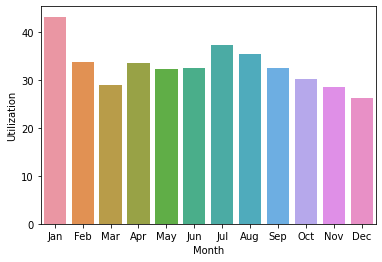

In [58]:
Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
MonthUtil['Month'] = pd.Categorical(MonthUtil['Month'], categories = Months, ordered= True)
MonthUtil.sort_values(by='Month', inplace=True)
sns.barplot(x="Month", y="Utilization",data=MonthUtil)

January has the highest utilization and December the lowest. There's a steady decline in Utilization from July to December.

## Conclusion
From a business and host point of view, to maximize utilization of listings, it's important to have them available in January. Also, if you would like to conduct time consuming repairs that would take days, December is a good month.